In [ ]:
from google.colab import files
uploaded = files.upload("Preprocessed_jobs.csv")

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Assuming the uploaded file is a CSV
  df = pd.read_csv(io.BytesIO(uploaded[fn]))

  # Now you can work with the DataFrame 'df'
  print(df.head())

Saving Preprocessed_jobs.csv to Preprocessed_jobs.csv
User uploaded file "Preprocessed_jobs.csv" with length 5017328 bytes
   Unnamed: 0         Search Term  \
0           0  Transformer Models   
1           1  Transformer Models   
2           2  Transformer Models   
3           3  Transformer Models   
4           4  Transformer Models   

                                     Job Description  Line Break Count  \
0  About Us:\nRivian and Volkswagen Group Technol...                42   
1  Job Description\nAI Research Scientist, Founda...                68   
2  Valence has built the first-to-market AI nativ...                46   
3  Job Description\n\nIntel AI Lab is a research ...                44   
4  Company Overview:\nAbout SS8 Networks: As a le...                53   

                             Cleaned Job Description  
0  rivian and volkswagen group technologies is a ...  
1  ai research scientist, foundation models prima...  
2  valence has built the firsttomarket ai na

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Load the tokenizer and model
model_name = "jjzha/jobbert_skill_extraction"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

# Create a pipeline for token classification
nlp_skill_extraction = pipeline(
    "token-classification",
    model=model,
    tokenizer=tokenizer,
    aggregation_strategy="simple"
)

# Chunking function based on token length
def chunk_text(text, tokenizer, max_len=500):
    tokens = tokenizer(text, truncation=False, return_offsets_mapping=False, return_tensors="pt")["input_ids"][0]
    token_chunks = [tokens[i:i+max_len] for i in range(0, len(tokens), max_len)]
    return [tokenizer.decode(chunk, skip_special_tokens=True) for chunk in token_chunks]

# Split into chunks
chunks = [chunk_text(desc, tokenizer) for desc in df['Cleaned Job Description'].tolist()]

# Flatten chunks and extract skills
all_skills = []
for chunk_list in chunks:
    for chunk in chunk_list:
        results = nlp_skill_extraction(chunk)
        all_skills.extend([r['word'] for r in results])

# Deduplicate
unique_skills_CDS = list(set(all_skills))

# Output
print(unique_skills_CDS)

Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


['##s research efforts', 'highly complex issues escalated by direct reports. responsibilities organizes and facilitates', 'responsible ai usage', 'and support forest', 'conferences, and', 'large multimodal foundation models', 'systems that balance scalability, availability, and', 'awareness of the hotline call system', ', and optimize ai agents for performance, robustness, and scalability', 'detect', ', maintain, analyze, and download various reporting spreadsheets', 'business requirements', 'and analyze user needs', 'projects simultaneously', 'accounts', 'the work plan', 'and improve workflows', 'technical information to nontechnical audiences', 'll', 'machine learning and optimization techniques', 'collaboration', 'alignment with strategic priorities', 'transformational leadership', 'decisions on system architecture', 'ai technologies', 'and manage large scale text, video and motion datasets', 'events such as aws', 'and optimize ai models', 'with staff', 'highimpact g', 'clear and de

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

filtered_skills = []
for skill in unique_skills_CDS:
  skill_words = skill.lower().split()
  if any(word not in stop_words for word in skill_words):
    filtered_skills.append(skill)

unique_skills = filtered_skills
unique_skills


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['##s research efforts',
 'highly complex issues escalated by direct reports. responsibilities organizes and facilitates',
 'responsible ai usage',
 'and support forest',
 'conferences, and',
 'large multimodal foundation models',
 'systems that balance scalability, availability, and',
 'awareness of the hotline call system',
 ', and optimize ai agents for performance, robustness, and scalability',
 'detect',
 ', maintain, analyze, and download various reporting spreadsheets',
 'business requirements',
 'and analyze user needs',
 'projects simultaneously',
 'accounts',
 'the work plan',
 'and improve workflows',
 'technical information to nontechnical audiences',
 'machine learning and optimization techniques',
 'collaboration',
 'alignment with strategic priorities',
 'transformational leadership',
 'decisions on system architecture',
 'ai technologies',
 'and manage large scale text, video and motion datasets',
 'events such as aws',
 'and optimize ai models',
 'with staff',
 'highim

In [ ]:
import pandas as pd
from google.colab import files

# Convert to DataFrame
df_skills = pd.DataFrame(unique_skills, columns=['Extracted competences'])  # change column name as needed

# Save to CSV
df_skills.to_csv('Unique_skills.csv', index=False)

# Download the CSV file
files.download('Unique_skills.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload("Unique_skills.csv")

import io
import pandas as pd

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  # Assuming the uploaded file is a CSV
  Unique_skills = pd.read_csv(io.BytesIO(uploaded[fn]))

  # Now you can work with the DataFrame 'df'
  print(Unique_skills.head())

Saving Unique_skills.csv to Unique_skills.csv/Unique_skills.csv
User uploaded file "Unique_skills.csv/Unique_skills.csv" with length 309099 bytes
                               Extracted competences
0                               ##s research efforts
1  highly complex issues escalated by direct repo...
2                               responsible ai usage
3                                 and support forest
4                                   conferences, and


In [ ]:
#Creation of reference set and embeddings
from sentence_transformers import SentenceTransformer
import numpy as np
import pandas as pd
import io
import json

# Load the extended reference set
uploaded = files.upload()

# Step 2: Read the JSON correctly
for fn in uploaded:
    reference_dict = json.load(io.BytesIO(uploaded[fn]))
    print(f"✅ Loaded {fn} successfully")

# Step 3: Flatten the structure
flattened_ref_set = [
    (category, competence)
    for category, competences in reference_dict.items()
    for competence in competences
]
model = SentenceTransformer('all-MiniLM-L6-v2')
competences = [comp[1] for comp in flattened_ref_set]
ref_embeddings = model.encode(competences)

# Save the embeddings and structure
np.save("reference_embeddings.npy", ref_embeddings)
reference_df = pd.DataFrame(flattened_ref_set, columns=["Category", "Competence"])
reference_df["Embedding"] = list(ref_embeddings)
reference_df.to_csv("reference_set.csv", index=False)

# Download the CSV file
files.download('reference_set.csv')
print("Reference set and embeddings saved.")

Saving cleaned_reference_set.json to cleaned_reference_set.json
✅ Loaded cleaned_reference_set.json successfully


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Reference set and embeddings saved.


In [ ]:
reference_df

,Category,Competence,Embedding
0,Big Data Technologies,AWS Glue,"[-0.09886945, 0.014878325, 0.002827856, 0.0010..."
1,Big Data Technologies,BigQuery,"[0.041246653, 0.07652569, -0.014814068, 0.0006..."
2,Big Data Technologies,Bigtable,"[0.05676808, 0.036612403, -0.05291579, -0.0499..."
3,Big Data Technologies,Cassandra,"[-0.03737553, -0.0041065607, -0.033766914, 0.0..."
4,Big Data Technologies,Dask,"[-0.07888508, 0.14144026, -0.07330635, 0.02844..."
...,...,...,...
1002,Visualization & Storytelling,Waterfall Charts,"[0.020506782, -0.025869276, 0.045323882, -0.01..."
1003,Visualization & Storytelling,Word Clouds,"[0.012577055, -0.0241976, 0.054579142, 0.01540..."
1004,Visualization & Storytelling,data storytelling,"[0.013932209, 0.007749299, 0.03490916, 0.03931..."
1005,Visualization & Storytelling,data visualization,"[0.09548572, 0.004180089, -0.042139664, -0.035..."


In [ ]:
#Compute cosine similarity between extracted skills and competences in references set
from sklearn.metrics.pairwise import cosine_similarity

#Extract the skills from Unique skills df
skills = Unique_skills["Extracted competences"].tolist()

# Load reference embeddings
ref_embeddings = np.load("reference_embeddings.npy")

# Embed your skills
skill_embeddings = model.encode(skills)

# Compute cosine similarity
similarity_matrix = cosine_similarity(skill_embeddings, ref_embeddings)

# Output results
for i, skill in enumerate(skills):
    most_similar_idx = similarity_matrix[i].argmax()
    print(f"Skill: {skill}")
    print(f"Closest Competence: {flattened_ref_set[most_similar_idx][1]} (Category: {flattened_ref_set[most_similar_idx][0]})")
    print(f"Similarity: {similarity_matrix[i].max():.4f}")
    print()

Streaming output truncated to the last 5000 lines.
Skill: data, model selection, model
Closest Competence: Model Optimization (Category: Machine Learning)
Similarity: 0.6369

Skill: your professional growth
Closest Competence: mastery (Category: Programming)
Similarity: 0.4111

Skill: month
Closest Competence: R (Category: Programming)
Similarity: 0.3245

Skill: the efficacy and creativity
Closest Competence: Persuasion Skills (Category: Communication Skills)
Similarity: 0.4138

Skill: clusters
Closest Competence: clustering (Category: Programming)
Similarity: 0.7615

Skill: and architectures
Closest Competence: Software Architecture (Category: Software Engineering)
Similarity: 0.5016

Skill: a vision, strategy, and roadmap
Closest Competence: Strategic Thinking (Category: Business Acumen)
Similarity: 0.5600

Skill: strong analytical and problemsol
Closest Competence: Numerical Analysis (Category: Mathematics & Statistics)
Similarity: 0.4286

Skill: performing
Closest Competence: compe

In [ ]:
# Find the index of the highest similarity for each topic
closest_indices = similarity_matrix.argmax(axis=1)

# Extract the closest competence and category for each topic
closest_matches = [
    {
        "Skill": skills[i],
        "Closest Competence": flattened_ref_set[closest_indices[i]][1],
        "Category": flattened_ref_set[closest_indices[i]][0],
        "Similarity Score": similarity_matrix[i, closest_indices[i]],
    }
    for i in range(len(skills))
]

# Convert to a DataFrame for easier analysis
df_matches = pd.DataFrame(closest_matches)

# Save to CSV
df_matches.to_csv('Matches_skills_ref.csv', index=False)

# Download the CSV file
files.download('Matches_skills_ref.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Define a similarity threshold
SIMILARITY_THRESHOLD = 0.6

# Filter topics with similarity above the threshold
filtered_matches = df_matches[df_matches["Similarity Score"] >= SIMILARITY_THRESHOLD]

# Display filtered matches
print("Filtered Matches (Threshold: 0.6):")
print(filtered_matches)

# Optionally save the results
filtered_matches.to_csv("filtered_similarity_matches.csv", index=False)

Filtered Matches (Threshold: 0.6):
                                                   Skill  \
2                                   responsible ai usage   
6      systems that balance scalability, availability...   
13                               projects simultaneously   
18          machine learning and optimization techniques   
19                                         collaboration   
...                                                  ...   
11344        and executing multiday, multifaceted events   
11346                               on customer feedback   
11348                            proactive communication   
11350     deep learning algorithms and predictive models   
11353                         and deploy generative ai g   

               Closest Competence                               Category  \
2                  Responsible AI                    Ethics & Compliance   
6         Scalability Engineering                   Software Engineering   
13              

In [ ]:
# Load embeddings and reference metadata
ref_embeddings = np.load("reference_embeddings.npy")
reference_df = pd.read_csv("cleaned_reference_set.csv")
reference_df["Embedding"] = list(ref_embeddings)

print("Reference set loaded with", len(reference_df), "competences.")


FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_reference_set.csv'

Topic Distribution by Category:
                                 Category  Count
2                             Programming   3452
10                   Communication Skills   1392
7                         Business Acumen   1301
4                    Software Engineering   1042
13                        Data Management    935
1                     Ethics & Compliance    626
6                        Machine Learning    556
0   Research Methods & Project Management    466
3                           Generative AI    409
12                        Cloud Computing    327
8                Mathematics & Statistics    303
9                   Big Data Technologies    234
5               Domain-Specific Knowledge    193
14                      Data Manipulation     83
11           Visualization & Storytelling     38


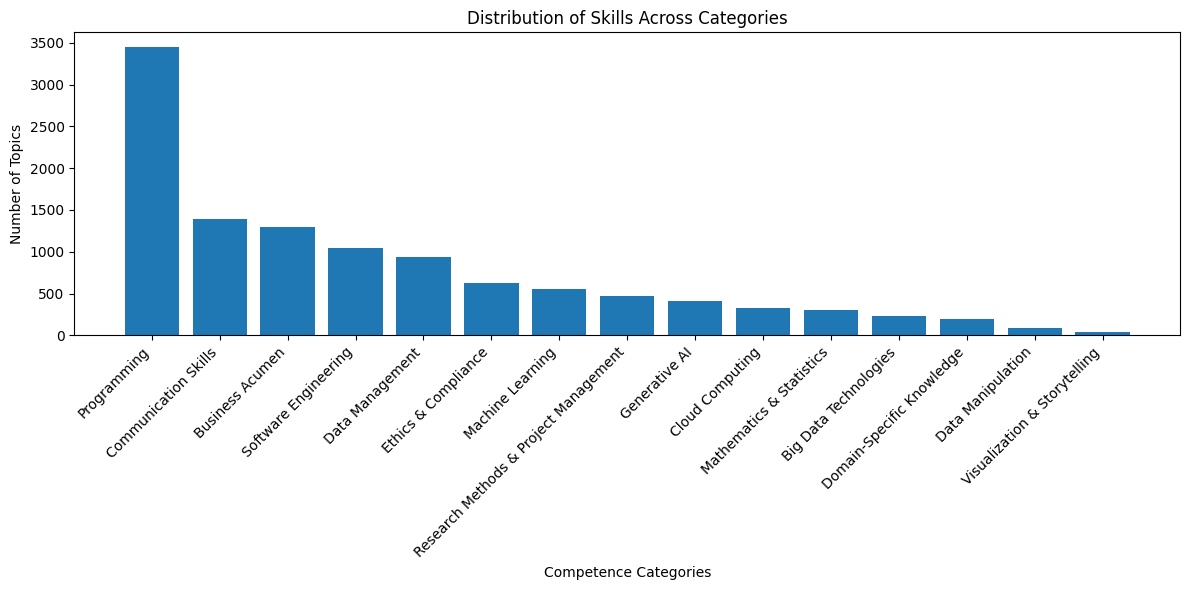

In [ ]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

# Find the closest competence for each topic
closest_indices = similarity_matrix.argmax(axis=1)
closest_categories = [flattened_ref_set[idx][0] for idx in closest_indices]

# Count occurrences of each category
category_counts = Counter(closest_categories)

# Convert to a DataFrame for better visualization
category_df = pd.DataFrame(category_counts.items(), columns=["Category", "Count"]).sort_values(by="Count", ascending=False)

# Display the category counts
print("Topic Distribution by Category:")
print(category_df)

# Plot the category distribution
plt.figure(figsize=(12, 6))
plt.bar(category_df["Category"], category_df["Count"])
plt.title("Distribution of Skills Across Categories")
plt.xlabel("Competence Categories")
plt.ylabel("Number of Topics")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Competence Distribution within Generative AI:
                                Competence  Count
1                           responsible ai   1587
5                              Fine-tuning   1247
0                                   ai llm    967
8                              ai auditing    720
11                        ai policy making    621
16                          sustainable ai    499
10                          ai regulations    455
7                           explainable ai    423
2                        Pretrained Models    417
24                           generative ai    414
20                  Knowledge Distillation    395
14                    Bidirectional Models    380
21                Data Augmentation for AI    380
9                       Text Summarization    327
6                      Text Classification    273
23                experience generative ai    236
3                         Diffusion Models    210
18             Natural Language Generation    186
22  

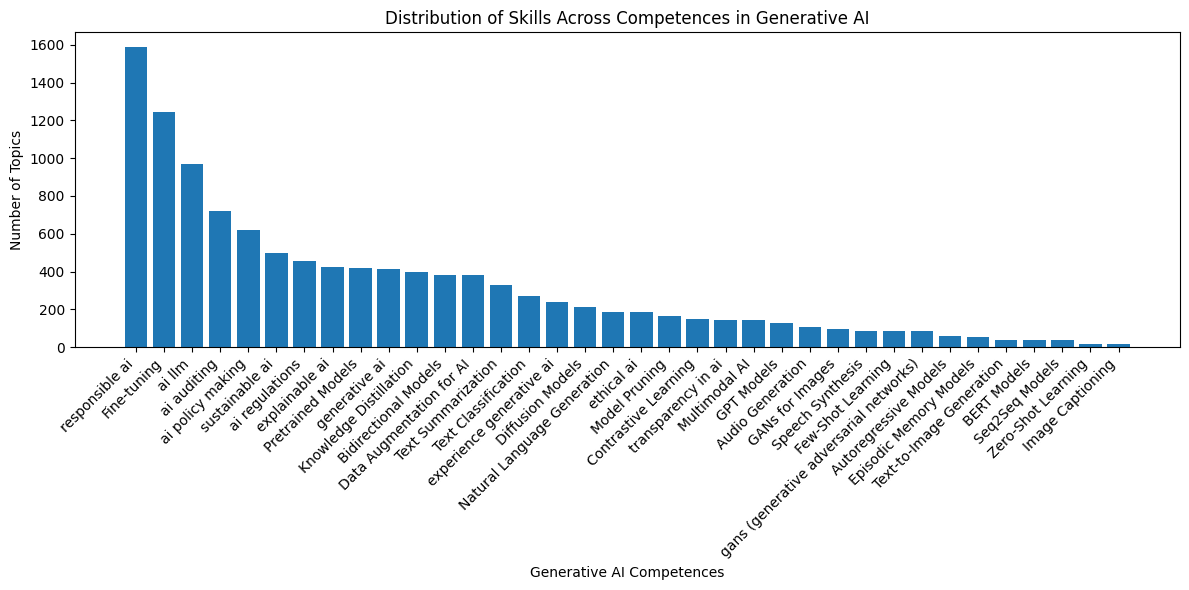

In [ ]:
# Filter the reference DataFrame for the "Generative AI" category
generative_ai_df = reference_df[reference_df["Category"] == "Generative AI"]

# Get the embeddings and competences for the filtered DataFrame
generative_ai_embeddings = np.array(generative_ai_df["Embedding"].tolist())
generative_ai_competences = generative_ai_df["Competence"].tolist()

# Compute cosine similarity between extracted skills and Generative AI competences
similarity_matrix_generative_ai = cosine_similarity(skill_embeddings, generative_ai_embeddings)

# Find the index of the highest similarity for each skill within the Generative AI competences
closest_indices_generative_ai = similarity_matrix_generative_ai.argmax(axis=1)

# Extract the closest competence and similarity score for each skill within Generative AI
closest_matches_generative_ai = [
    {
        "Skill": skills[i],
        "Closest Competence": generative_ai_competences[closest_indices_generative_ai[i]],
        "Similarity Score": similarity_matrix_generative_ai[i, closest_indices_generative_ai[i]],
    }
    for i in range(len(skills))
]

# Convert to a DataFrame for easier analysis
df_matches_generative_ai = pd.DataFrame(closest_matches_generative_ai)

# Find the closest competence for each topic within Generative AI
closest_competences_generative_ai = [
    generative_ai_competences[idx] for idx in closest_indices_generative_ai
]

# Count occurrences of each competence within Generative AI
competence_counts_generative_ai = Counter(closest_competences_generative_ai)

# Convert to a DataFrame for better visualization
competence_df_generative_ai = pd.DataFrame(
    competence_counts_generative_ai.items(),
    columns=["Competence", "Count"]
).sort_values(by="Count", ascending=False)

# Display the competence counts within Generative AI
print("Competence Distribution within Generative AI:")
print(competence_df_generative_ai)

# Plot the competence distribution within Generative AI
plt.figure(figsize=(12, 6))
plt.bar(competence_df_generative_ai["Competence"], competence_df_generative_ai["Count"])
plt.title("Distribution of Skills Across Competences in Generative AI")
plt.xlabel("Generative AI Competences")
plt.ylabel("Number of Topics")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load embeddings and metadata
ref_embeddings = np.load("reference_embeddings.npy")
reference_df = pd.read_csv("cleaned_reference_set.csv")
reference_df["Embedding"] = list(ref_embeddings)  # Attach embeddings

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_reference_set.csv'

Topic Distribution by Competence (Count >= 200):
                 Closest Competence  Count
8                         continues    453
6                   Team Leadership    348
4                team collaboration    303
3    engineering relevant technical    237
9                 Customer Insights    232
1   Understanding Business Problems    206
2                  Project Planning    175
7               product engineering    167
5                Strategic Thinking    125
11                  Decision Making    114
0                       competition    109
10             Interpersonal Skills    103


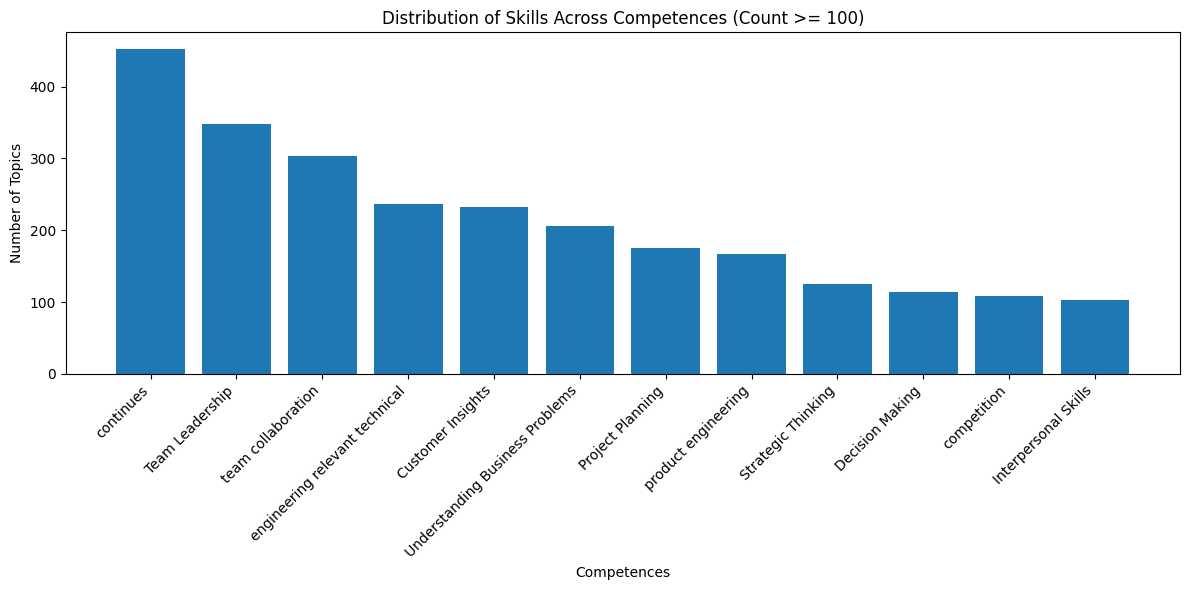

In [ ]:
# Find the closest competence for each topic
closest_indices = similarity_matrix.argmax(axis=1)
closest_competences = [flattened_ref_set[idx][1] for idx in closest_indices]

# Count occurrences of each competence
competence_counts = Counter(closest_competences)

# Filter out competences with counts less than 2
filtered_competence_counts = {competence: count for competence, count in competence_counts.items() if count >= 100}

# Convert to a DataFrame for better visualization
competence_df = pd.DataFrame(list(filtered_competence_counts.items()), columns=["Closest Competence", "Count"]).sort_values(by="Count", ascending=False)

# Display the competence counts
print("Topic Distribution by Competence (Count >= 200):")
print(competence_df)

# Plot the competence distribution
plt.figure(figsize=(12, 6))
plt.bar(competence_df["Closest Competence"], competence_df["Count"])
plt.title("Distribution of Skills Across Competences (Count >= 100)")
plt.xlabel("Competences")
plt.ylabel("Number of Topics")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


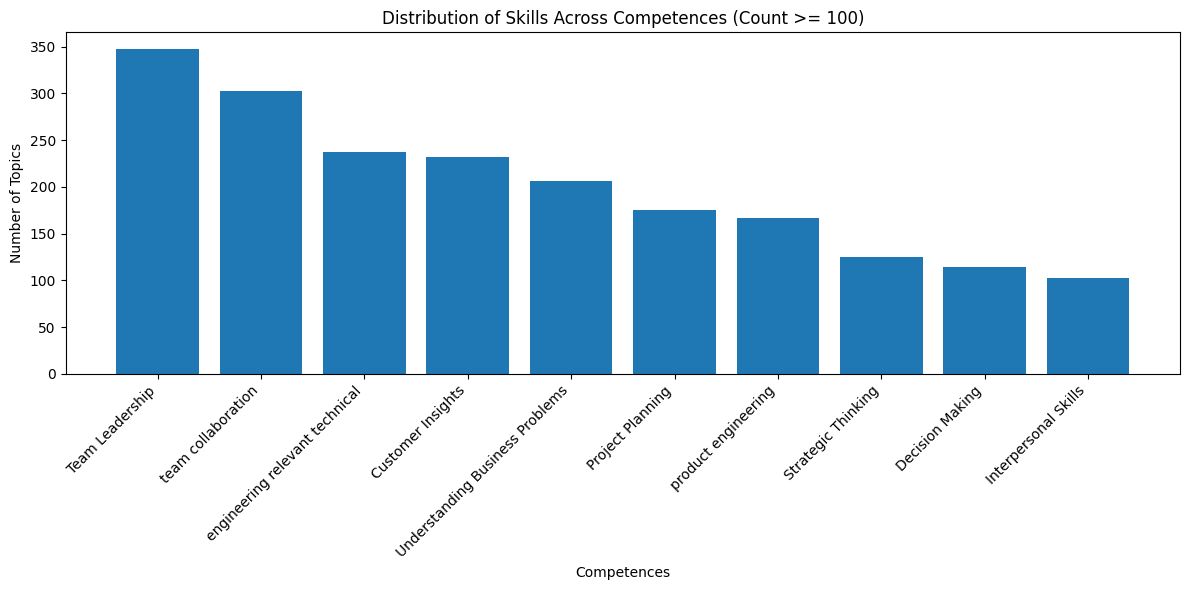

In [ ]:
# Filter out 'Continues' and 'Competition'
competence_df_filtered = competence_df[
    ~competence_df["Closest Competence"].isin(["continues", "competition"])
]

# Plotting the filtered competence distribution
plt.figure(figsize=(12, 6))
plt.bar(
    competence_df_filtered["Closest Competence"],
    competence_df_filtered["Count"],
)
plt.title("Distribution of Skills Across Competences (Count >= 100)")
plt.xlabel("Competences")
plt.ylabel("Number of Topics")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
